In [2]:
import sys, os, django
import pandas as pd

sys.path.append('/home/galm/software/django/tmv/BasicBrowser/')
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

from scoping.models import *

from pyparsing import *

q = Query.objects.get(pk=7638)
import lxml.etree as ET
import datetime
import matplotlib.pyplot as plot
import random


In [8]:
def write_d_record(records, d):
    
    record = ET.SubElement(records, 'record')
    
    
    db = ET.SubElement(record,'database')
    db.set('name',"APSIS")
    db.set('path','')
    db.text = "APSIS"

    source_app = ET.SubElement(record, 'source-app')
    source_app.text="EndNote"
    source_app.set('name','EndNote')
    source_app.set('version', '17.7')

    r_c= ET.SubElement(record,'rec-number')
    r_c.text=str(d.id)

    rt = [x for x in ref_type_dict if d.wosarticle.pt in x["db"]][0]

    r_t = ET.SubElement(record,'ref-type')
    r_t.text = rt["EN_n"]
    r_t.set("name", rt["EN_s"])

    contrib = ET.SubElement(record, 'contributors')
    authors = ET.SubElement(contrib, 'authors')

    author_list = []
    for dai in d.docauthinst_set.order_by('position'):
        if dai.AU not in author_list:
            au = ET.SubElement(authors, 'author')
            s = ET.SubElement(au,'style')
            s.text = dai.AU
            author_list.append(dai.AU)

    titles = ET.SubElement(record, 'titles')
    title = ET.SubElement(titles, 'title')
    s = ET.SubElement(title, 'style')
    s.text = d.title
    stitle = ET.SubElement(titles, 'secondary-title')
    s = ET.SubElement(stitle, 'style')
    s.text = d.wosarticle.so

    periodical = ET.SubElement(record, 'periodical')
    ft = ET.SubElement(periodical, 'full-title')
    s = ET.SubElement(ft, 'style')
    s.text = d.wosarticle.so
    s.set("size", "100%")
    s.set("font", "default")
    s.set("face", "normal")

    pages = ET.SubElement(record, 'pages')
    s = ET.SubElement(pages, 'style')
    s.text=f"{d.wosarticle.bp}-{d.wosarticle.ep}"

    vol = ET.SubElement(record,'volume')
    s = ET.SubElement(vol, 'style')
    s.text=d.wosarticle.vl

    if d.wosarticle.ar:
        ar = ET.SubElement(record,'number')
        s = ET.SubElement(ar, 'style')
        s.text=d.wosarticle.ar

    if d.wosarticle.iss:
        iss = ET.SubElement(record,'issue')
        s = ET.SubElement(iss, 'style')
        s.text=d.wosarticle.iss

    if d.wosarticle.de:
        kws = ET.SubElement(record,'keywords')
        for de in d.wosarticle.de.split('; '):
            kw = ET.SubElement(kws, 'keyword')
            s = ET.SubElement(kw, 'style')
            s.text=de

    dates = ET.SubElement(record, 'dates')
    py = ET.SubElement(dates, 'year')
    s = ET.SubElement(py, 'style')
    s.text=str(d.PY) 

    if d.wosarticle.pu:
        pu = ET.SubElement(record, 'publisher')
        s = ET.SubElement(pu, 'style')
        s.text = d.wosarticle.pu

    if d.wosarticle.pa:
        pa = ET.SubElement(record, 'pub-location')
        s = ET.SubElement(pa, 'style')
        s.text = d.wosarticle.pa

    if d.wosarticle.di:
        doi = ET.SubElement(record, 'doi')
        s = ET.SubElement(doi, 'style')
        s.text = d.wosarticle.di

    ab = ET.SubElement(record, 'abstract')
    s = ET.SubElement(ab, 'style')
    s.text = d.content   
    
    pdcs = d.category.filter(project=q.project, level__in=[3,4],doccat__top_cat=True).order_by('id')
    
    c1 = ET.SubElement(record, 'custom1')
    s = ET.SubElement(c1, 'style')
    s.text = pdcs[0].name

    c2 = ET.SubElement(record, 'custom2')
    s = ET.SubElement(c1, 'style')
    s.text = pdcs[1].name
    

In [9]:
ref_type_dict = [
    {"db": ["J","JOUR"], "EN_n": "17", "EN_s": "Journal Article"},
    {"db": ["S","SER"], "EN_n": "31", "EN_s": "Serial"},
    {"db": ["B","BOOK"], "EN_n": "7", "EN_s": "Book"},
    {"db": ["CHAP"], "EN_n": "6", "EN_s": "Book Section"},
    {"db": ["CONF", "INPR"], "EN_n": "11", "EN_s": "Conference Proceedings"},
    {"db": ["PDF", None], "EN_n": "1", "EN_s": "GENERIC"},
    {"db": ["RPRT"], "EN_n": "30", "EN_s": "Report"},
    {"db": ["CASE"], "EN_n": "8", "EN_s": "Case"},
]


def export_en_xml(docs, fname):

    # create the file structure
    xml = ET.Element('xml')
    records = ET.SubElement(xml, 'records')

    db_name = "APSIS - "

    for d in docs:
        record = ET.SubElement(records, 'record')

        db = ET.SubElement(record,'database')
        db.set('name',db_name)
        db.set('path','')
        db.text = db_name

        source_app = ET.SubElement(record, 'source-app')
        source_app.text="EndNote"
        source_app.set('name','EndNote')
        source_app.set('version', '17.7')

        r_c= ET.SubElement(record,'rec-number')
        r_c.text=str(d.id)

        rt = [x for x in ref_type_dict if d.wosarticle.pt in x["db"]][0]

        r_t = ET.SubElement(record,'ref-type')
        r_t.text = rt["EN_n"]
        r_t.set("name", rt["EN_s"])

        contrib = ET.SubElement(record, 'contributors')
        authors = ET.SubElement(contrib, 'authors')

        author_list = []
        for dai in d.docauthinst_set.order_by('position'):
            if dai.AU not in author_list:
                au = ET.SubElement(authors, 'author')
                s = ET.SubElement(au,'style')
                s.text = dai.AU
                author_list.append(dai.AU)

        titles = ET.SubElement(record, 'titles')
        title = ET.SubElement(titles, 'title')
        s = ET.SubElement(title, 'style')
        s.text = d.title
        stitle = ET.SubElement(titles, 'secondary-title')
        s = ET.SubElement(stitle, 'style')
        s.text = d.wosarticle.so

        periodical = ET.SubElement(record, 'periodical')
        ft = ET.SubElement(periodical, 'full-title')
        s = ET.SubElement(ft, 'style')
        s.text = d.wosarticle.so
        s.set("size", "100%")
        s.set("font", "default")
        s.set("face", "normal")

        pages = ET.SubElement(record, 'pages')
        s = ET.SubElement(pages, 'style')
        s.text=f"{d.wosarticle.bp}-{d.wosarticle.ep}"

        vol = ET.SubElement(record,'volume')
        s = ET.SubElement(vol, 'style')
        s.text=d.wosarticle.vl

        if d.wosarticle.ar:
            ar = ET.SubElement(record,'number')
            s = ET.SubElement(ar, 'style')
            s.text=d.wosarticle.ar

        if d.wosarticle.iss:
            iss = ET.SubElement(record,'issue')
            s = ET.SubElement(iss, 'style')
            s.text=d.wosarticle.iss

        if d.wosarticle.de:
            kws = ET.SubElement(record,'keywords')
            for de in d.wosarticle.de.split('; '):
                kw = ET.SubElement(kws, 'keyword')
                s = ET.SubElement(kw, 'style')
                s.text=de

        dates = ET.SubElement(record, 'dates')
        py = ET.SubElement(dates, 'year')
        s = ET.SubElement(py, 'style')
        s.text=str(d.PY) 

        if d.wosarticle.pu:
            pu = ET.SubElement(record, 'publisher')
            s = ET.SubElement(pu, 'style')
            s.text = d.wosarticle.pu

        if d.wosarticle.pa:
            pa = ET.SubElement(record, 'pub-location')
            s = ET.SubElement(pa, 'style')
            s.text = d.wosarticle.pa

        if d.wosarticle.di:
            doi = ET.SubElement(record, 'doi')
            s = ET.SubElement(doi, 'style')
            s.text = d.wosarticle.di

        ab = ET.SubElement(record, 'abstract')
        s = ET.SubElement(ab, 'style')
        s.text = d.content
            
    with open(fname,"w") as f:
        f.write(ET.tostring(xml).decode("utf-8"))

In [10]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")


In [11]:
folder = '/home/galm/ownCloud/adaptation-tracking/'
files = os.listdir(folder) + os.listdir(f'{folder}/imported')
    


# Get all docs, that is, all docs not yet exported and not having a primary category

- First read what was exported

In [12]:
already_exported = []
for file in files:
    if ".xml" not in file:
        continue
    with open(f'{folder}/{file}') as f:
        tree = ET.parse(f)
        root = tree.getroot()
        for rs in root.iter('records'):
            for r in rs.iter('record'):
                for rn in r.iter('rec-number'):
                    already_exported.append(int(rn.text))
    print(len(already_exported))

6
20
79
174
177
220
236
327
333
403
442
469
652
728
799
802
869
912
923
950
1026
1048
1056
1086
1095
1731
1740
1851
1884
1913
1917
1961
2130
2182
2256
2278
2295
2363
2367
2385
2658
2685
2721
2731
2744


In [13]:
len(set(already_exported))

2233

In [14]:
docs = Doc.objects.filter(pk__in=already_exported)
docs.count()
df = pd.DataFrame.from_dict(docs.values('title','PY'))
df.head()

,PY,title
0,2013,Drowning the suburb: settlement planning and c...
1,2014,Variable adaptations: Micro-politics of enviro...
2,2017,How do people's perceptions and climatic disas...
3,2016,Integrated environmental assessment to explore...
4,1999,Weathering climate change: some simple rules t...


In [15]:
print(df.shape)
df[df.duplicated()].shape

(2229, 2)


(6, 2)

In [16]:
df[df.duplicated()]

,PY,title
2020,2019,In-Situ Adaptation and Coastal Vulnerabilities...
2033,2019,Climate proofing social housing in the Netherl...
2180,2019,Residential buyouts as environmental mobility:...
2184,2019,Climate smart agricultural practices and gende...
2185,2019,Is there any chance for the poor to cope with ...
2194,2019,Adoption of climate change adaptation strategi...


In [18]:
from django.core.exceptions import FieldDoesNotExist, ObjectDoesNotExist, MultipleObjectsReturned

from django.db import connection
with connection.cursor() as cursor:
    cursor.execute('SELECT set_limit(0.8);')
    row = cursor.fetchone()

dup_dict = []
dups = 0
for i,d in enumerate(docs.order_by('id')):
    if i % 50==0:
        print(i)
    try:
        doc = docs.filter(pk__gt=d.pk).get(title__trigram_similar=d.title)
        print(d.PY, d.title)
        print(doc.PY, doc.title)
        dup_dict.append({
            "d1_id":d.pk, "d1_title":d.title,"d1_PY": d.PY, 
            "d2_id": doc.pk, "d2_title":doc.title, "d2_PY": doc.PY
        })
        dups+=1
    except ObjectDoesNotExist:
        pass
    except MultipleObjectsReturned:
        print(f"found multiple similar objects for {get(r,'ti')}")        

0
2014 Perceptions of forest experts on climate change and fire management in European Mediterranean forests
2013 Perceptions of forest experts on climate change and fire management in European Mediterranean forests
2013 Fruit vegetable farmers' perception of climate change and adaptation strategies in Gombe state, Nigeria
2013 Fruit Vegetable Farmers' Perception of Climate Change and Adaptation Strategies in Gombe State, Nigeria
2013 Sustainability principles put into practice: case studies of network analysis in Swiss climate change adaptation
2015 Sustainability principles put into practice: case studies of network analysis in Swiss climate change adaptation
50
2015 Climate change impacts on Siberia’s evenki: A study of traditional land use and adaptation in southern Yakutia
2015 CLIMATE CHANGE IMPACTS ON SIBERIA'S EVENKI: A STUDY OF TRADITIONAL LAND USE AND ADAPTATION IN SOUTHERN YAKUTIA
100
2017 Comparing smallholder farmers’ perception of climate change with meteorological data: 

2019 Climate smart agricultural practices and gender differentiated nutrition outcome: An empirical evidence from Ethiopia
2019 Climate smart agricultural practices and gender differentiated nutrition outcome: An empirical evidence from Ethiopia
2100
2019 Establishing the nexus between climate change adaptation strategy and smallholder farmers’ food security status in South Africa: A bi-casual effect using instrumental variable approach
2019 Establishing the nexus between climate change adaptation strategy and smallholder farmers' food security status in South Africa: A bi-casual effect using instrumental variable approach
2019 Residential buyouts as environmental mobility: examining where homeowners move to illuminate social inequities in climate adaptation
2019 Residential buyouts as environmental mobility: examining where homeowners move to illuminate social inequities in climate adaptation
2150
2200
2019 Climate change resiliency choices of small-scale farmers in Cameroon: determin

In [19]:
dup_df = pd.DataFrame.from_dict(dup_dict)
print(dup_df.shape)
dup_df.head()
dup_df.to_csv('exported_duplicates.csv',)

(40, 6)


,d1_PY,d1_id,d1_title,d2_PY,d2_id,d2_title
0,2014,16478,Perceptions of forest experts on climate chang...,2013,323648,Perceptions of forest experts on climate chang...
1,2013,19448,Fruit vegetable farmers' perception of climate...,2013,1830634,Fruit Vegetable Farmers' Perception of Climate...
2,2013,33247,Sustainability principles put into practice: c...,2015,315673,Sustainability principles put into practice: c...
3,2015,86075,Climate change impacts on Siberia’s evenki: A ...,2015,1878774,CLIMATE CHANGE IMPACTS ON SIBERIA'S EVENKI: A ...
4,2017,99668,Comparing smallholder farmers’ perception of c...,2017,1854128,Comparing smallholder farmers' perception of c...


In [9]:
# All exportable docs
doc_ids = set(Doc.objects.filter(query=q, category__name__in=["Yes","Maybe"]).values_list('id',flat=True))
# Docs with a pc
pc_ids = set(Doc.objects.filter(query=q, category__level=9).values_list('id',flat=True))
print(len(doc_ids - set(already_exported)))
ex_ids = doc_ids - pc_ids - set(already_exported)

len(ex_ids)



178


3

In [8]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

docs = Doc.objects.filter(pk__in=ex_ids)

if docs.exists():
    export_en_xml(docs, f"/home/galm/ownCloud/adaptation-tracking/Batch6_All - APSIS export - [{len(docs)}] - {now}.xml")
    print("exported docs")

exported docs


### Go through each category, exporting docs which have not been exported

In [10]:
docs = Doc.objects.filter(pk__in=doc_ids)
exported_docs = set(already_exported) 
for c in Category.objects.filter(project=193,level=9):
    cdocs = c.doc_set.exclude(
        pk__in=already_exported,
        #doccat__top_cat=True
    )
    fname = f"Batch6_{c.name} - APSIS export - [{cdocs.count()}] - {now}.xml"
    export_en_xml(cdocs, f"{folder}/{fname}")
    for d in cdocs:
        if d.doccat_set.filter(category=c).count()>1:
            d.doccat_set.filter(category=c).first().delete()
        dc = d.doccat_set.get(category=c)
        dc.top_cat=True
        dc.save()
    print(fname)

    

Batch6_Poverty, livelihoods, and sustainable development - APSIS export - [6] - 2020-04-08 16:28:17.xml
Batch6_Terrestrial & freshwater ecosystems - APSIS export - [4] - 2020-04-08 16:28:17.xml
Batch6_Asia & Australasia - APSIS export - [27] - 2020-04-08 16:28:17.xml
Batch6_North America - APSIS export - [18] - 2020-04-08 16:28:17.xml
Batch6_Europe - APSIS export - [13] - 2020-04-08 16:28:17.xml
Batch6_Africa - APSIS export - [14] - 2020-04-08 16:28:17.xml
Batch6_Health, well-being, and communities - APSIS export - [27] - 2020-04-08 16:28:17.xml
Batch6_Central & South America - APSIS export - [3] - 2020-04-08 16:28:17.xml
Batch6_Small Island States - APSIS export - [4] - 2020-04-08 16:28:17.xml
Batch6_Ocean & coastal ecosystems - APSIS export - [6] - 2020-04-08 16:28:17.xml
Batch6_Food, fibre, and other ecosystem products - APSIS export - [30] - 2020-04-08 16:28:17.xml
Batch6_Water quality & sanitation - APSIS export - [16] - 2020-04-08 16:28:17.xml
Batch6_Cities, settlements & key inf

In [18]:
docs = Doc.objects.filter(pk__in=doc_ids)
exported_docs = set(already_exported)
for c in Category.objects.filter(project=193,level=9):
    cdocs = c.doc_set.exclude(
        pk__in=already_exported,
        #doccat__top_cat=True
    )
    fname = f"Batch4_{c.name} - APSIS export - [{cdocs.count()}] - {now}.xml"
    for d in cdocs:
        pass
        
    print(fname)


Batch4_Poverty, livelihoods, and sustainable development - APSIS export - [117] - 2019-11-28 12:04:57.xml
Batch4_Terrestrial & freshwater ecosystems - APSIS export - [12] - 2019-11-28 12:04:57.xml
Batch4_Asia & Australasia - APSIS export - [289] - 2019-11-28 12:04:57.xml
Batch4_North America - APSIS export - [74] - 2019-11-28 12:04:57.xml
Batch4_Europe - APSIS export - [86] - 2019-11-28 12:04:57.xml
Batch4_Africa - APSIS export - [191] - 2019-11-28 12:04:57.xml
Batch4_Health, well-being, and communities - APSIS export - [81] - 2019-11-28 12:04:57.xml
Batch4_Central & South America - APSIS export - [63] - 2019-11-28 12:04:57.xml
Batch4_Small Island States - APSIS export - [31] - 2019-11-28 12:04:57.xml
Batch4_Ocean & coastal ecosystems - APSIS export - [27] - 2019-11-28 12:04:57.xml
Batch4_Food, fibre, and other ecosystem products - APSIS export - [655] - 2019-11-28 12:04:57.xml
Batch4_Water quality & sanitation - APSIS export - [71] - 2019-11-28 12:04:57.xml
Batch4_Cities, settlements 

In [24]:
docs = Doc.objects.filter(pk__in=doc_ids)
exported_docs = set(already_exported) | ex_ids
for c in Category.objects.filter(project=193,level=9):
    cdocs = c.doc_set.exclude(
        pk__in=already_exported,
        #doccat__top_cat=True
    )
    fname = f"Batch4_{c.name} - APSIS export - [{cdocs.count()}] - {now}.xml"
    for d in cdocs:
        exported_docs.add(d.id)
        pass
        
    print(fname)

Batch4_Poverty, livelihoods, and sustainable development - APSIS export - [117] - 2019-11-28 12:04:57.xml
Batch4_Terrestrial & freshwater ecosystems - APSIS export - [12] - 2019-11-28 12:04:57.xml
Batch4_Asia & Australasia - APSIS export - [289] - 2019-11-28 12:04:57.xml
Batch4_North America - APSIS export - [74] - 2019-11-28 12:04:57.xml
Batch4_Europe - APSIS export - [86] - 2019-11-28 12:04:57.xml
Batch4_Africa - APSIS export - [191] - 2019-11-28 12:04:57.xml
Batch4_Health, well-being, and communities - APSIS export - [81] - 2019-11-28 12:04:57.xml
Batch4_Central & South America - APSIS export - [63] - 2019-11-28 12:04:57.xml
Batch4_Small Island States - APSIS export - [31] - 2019-11-28 12:04:57.xml
Batch4_Ocean & coastal ecosystems - APSIS export - [27] - 2019-11-28 12:04:57.xml
Batch4_Food, fibre, and other ecosystem products - APSIS export - [657] - 2019-11-28 12:04:57.xml
Batch4_Water quality & sanitation - APSIS export - [71] - 2019-11-28 12:04:57.xml
Batch4_Cities, settlements 

In [25]:
len(exported_docs)

1725

In [6]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
cat = Category.objects.get(name="Africa", project=q.project)
doc_ids = set(Doc.objects.filter(
    query=q, category__name="Yes"
).values_list('pk',flat=True))

af_ids = set(Doc.objects.filter(
    query=q, category=cat
).values_list('pk',flat=True))

docs = Doc.objects.filter(pk__in=doc_ids & af_ids)

#export_en_xml(docs, f"{cat.name} - APSIS export - {now}.xml")

#print(mydata.decode("utf-8"))

In [7]:
doc_ids = set(Doc.objects.filter(
    query=q, category__name="Yes"
).values_list('pk',flat=True))

docs = Doc.objects.filter(
    pk__in=doc_ids
)

cdocs = Doc.objects.filter(
    pk__in=doc_ids,
    category__level__in=[3,4]
)
cat_table = cdocs.values('id','category__name')

cat_df = pd.DataFrame.from_dict(cat_table)

cat_df.head()

,category__name,id
0,Africa,19448
1,"Food, fibre, and other ecosystem products",19448
2,"Poverty, livelihoods, and sustainable development",37942
3,Terrestrial & freshwater ecosystems,37942
4,"Food, fibre, and other ecosystem products",37942


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1f5dbeb240>]],
      dtype=object)

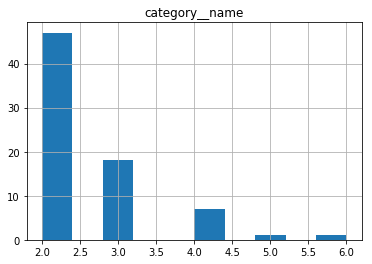

In [8]:
cat_df.groupby('id').count().hist()

In [50]:
DocCat.objects.filter(top_cat=True).update(top_cat=False)

0

In [23]:
cats = Category.objects.filter(project=q.project, level__in=[3,4])
doc_list = []
pcats = cats.filter(name__in=["Africa"])

def add_cat_list(c,d,doc_list):
    dc = DocCat.objects.get(doc=d,category=c)
    dc.top_cat=True
    dc.save()
    if d not in doc_list:
        doc_list.append(d)
    return 1


for d in docs:
    pdc = d.category.filter(project=q.project, level__in=[3,4],doccat__top_cat=True).count()
    if pdc==1:
        continue
    elif pdc==0:
        dc = d.category.filter(project=q.project, level__in=[3,4])
        if dc.count() < 1- pdc:
            print("not enough cats")
            print(d.title)
            continue
        for c in pcats:
            if c in dc:
                if pdc < 2:
                    pdc += add_cat_list(c,d,doc_list)
        dc = dc.exclude(pk__in=pcats)
        ccs = dc.filter(id__in=random.sample(set(dc.values_list('pk',flat=True)),2-pdc))
        for c in ccs:
            if pdc < 2:
                pdc += add_cat_list(c, d, doc_list)
    else:
        print("problems!")
        print(pdc)

not enough cats
Evidence and perceptions of rainfall change in Malawi: Do maize cultivar choices enhance climate change adaptation in sub-Saharan Africa?
not enough cats
Adaptation to climate change impacts: coping strategies of an indigenous community in Ghana to declining water supply
not enough cats
Effects of sowing time on agronomic characteristics and yield of quinoa
not enough cats
Effects of climate change on burn probability of forests in Daxing'anling


In [ ]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

# create the file structure
xml = ET.Element('xml')
records = ET.SubElement(xml, 'records')

db_name = "APSIS - "

for d in doc_list:
    write_d_record(records, d)
    
fname = f"APSIS - all - {now}.xml"
with open(fname,"w") as f:
    f.write(ET.tostring(xml).decode("utf-8"))

In [139]:
cats = Category.objects.filter(project=q.project, level__in=[3,4])
cat_dict = list(cats.values('name'))
pcats = cats.filter(name__in=["Africa"])

for c in cat_dict:
    c['doclist'] = []

def add_cat_list(c,d,cat_dict):
    dc = DocCat.objects.get(doc=d,category=c)
    dc.top_cat=True
    dc.save()
    for cat in cat_dict:
        if cat['name']==c.name:
            cat['doclist'].append(d.id)
    return 1


for d in docs:
    pdc = d.category.filter(project=q.project, level__in=[3,4],doccat__top_cat=True).count()
    if pdc==2:
        continue
    elif pdc==0:
        dc = d.category.filter(project=q.project, level__in=[3,4])
        if dc.count() < 2- pdc:
            print("not enough cats")
            print(d.title)
            continue
        for c in pcats:
            if c in dc:
                if pdc < 2:
                    pdc += add_cat_list(c,d,cat_dict)
        dc = dc.exclude(pk__in=pcats)
        ccs = dc.filter(id__in=random.sample(set(dc.values_list('pk',flat=True)),2-pdc))
        for c in ccs:
            if pdc < 2:
                pdc += add_cat_list(c, d, cat_dict)
    else:
        print("problems!")
        print(pdc)

cat_dict

not enough cats
Evidence and perceptions of rainfall change in Malawi: Do maize cultivar choices enhance climate change adaptation in sub-Saharan Africa?
not enough cats
Adaptation to climate change impacts: coping strategies of an indigenous community in Ghana to declining water supply
not enough cats
Effects of sowing time on agronomic characteristics and yield of quinoa
not enough cats
Effects of climate change on burn probability of forests in Daxing'anling


[{'doclist': [652369, 899901], 'name': 'North America'},
 {'doclist': [47207, 746124, 778629, 799776, 1277970], 'name': 'Europe'},
 {'doclist': [40076, 1277970, 2374012],
  'name': 'Terrestrial & freshwater ecosystems'},
 {'doclist': [44683, 83426, 446695, 450276, 509759, 649460, 778629],
  'name': 'General'},
 {'doclist': [19448,
   116717,
   151419,
   151600,
   165057,
   172233,
   231841,
   251828,
   268986,
   273466,
   278918,
   296193,
   308673,
   313033,
   411658,
   446695,
   448266,
   450276,
   504549,
   509759,
   520487,
   559201,
   807809,
   1547893,
   1646564],
  'name': 'Africa'},
 {'doclist': [319250, 898298, 1298820, 1547893, 1646564],
  'name': 'Health, well-being, and communities'},
 {'doclist': [40076, 100910, 165057], 'name': 'Central & South America'},
 {'doclist': [], 'name': 'Small Island States'},
 {'doclist': [386580], 'name': 'Ocean & coastal ecosystems'},
 {'doclist': [19448,
   100910,
   116717,
   151419,
   151600,
   231841,
   251828,

In [140]:
now = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

for c in cat_dict:
    nd = len(c['doclist'])
    docs = Doc.objects.filter(pk__in=c['doclist'])
    export_en_xml(docs, f"_{c['name']}_ [{nd}] ({now}).xml")

In [132]:
for c in cat_dict:
    rpat = '_'+c["name"]+'_'
    files = [f for f in os.listdir('.') if re.match(rpat, f)]

    xml = ET.Element('xml')
    records = ET.SubElement(xml, 'records')

    days = []
    ndocs = 0
    for fname in files:
        for d in re.match('.*\((\S*)',fname).group(1).split(','):
            days.append(d)

        with open(fname,"r") as f:
            d = ET.parse(f).getroot()
            for rr in d.iter('records'):
                for r in rr.iter('record'):
                    rec = records.append(r)   
                    ndocs += 1
        os.remove(fname)

    new_fname = f'_{c["name"]}_ [{ndocs}] ({",".join(set(days))} ).xml'  
    print(new_fname)

    with open(new_fname,"w") as f:
        f.write(ET.tostring(xml).decode("utf-8"))

_North America_ [0] (2019-10-15 ).xml
_Europe_ [0] (2019-10-15 ).xml
_Terrestrial & freshwater ecosystems_ [0] (2019-10-15 ).xml
_General_ [9] (2019-10-15 ).xml
_Africa_ [75] (2019-10-15 ).xml
_Health, well-being, and communities_ [3] (2019-10-15 ).xml
_Central & South America_ [0] (2019-10-15 ).xml
_Small Island States_ [0] (2019-10-15 ).xml
_Ocean & coastal ecosystems_ [0] (2019-10-15 ).xml
_Food, fibre, and other ecosystem products_ [54] (2019-10-15 ).xml
_Australasia_ [3] (2019-10-15 ).xml
_Water quality & sanitation_ [0] (2019-10-15 ).xml
_Cities, settlements & key infrastructure_ [3] (2019-10-15 ).xml
_Poverty, livelihoods, and sustainable development_ [3] (2019-10-15 ).xml
_Asia_ [0] (2019-10-15 ).xml
_Global or NA_ [0] (2019-10-15 ).xml


In [113]:
",".join(set(days))

'2019-10-15'